In [1]:
from fktools import *
import tensorflow as tf
import sklearn
from dist_metric import DistributionOverlapSingle, DistributionOverlap

2026-01-18 16:41:16.456202: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-18 16:41:16.487913: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-18 16:41:17.253007: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/filip/miniconda3/envs/defects/lib/python3.11/site-packages/keras/src/export/tf2onnx_l

In [2]:
tf.device(tf.config.list_logical_devices('GPU')[0].name)

I0000 00:00:1768750877.531523   29590 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1183 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
# X = np.load("dataset_X.npz")['arr_0']
# y = np.load("dataset_y.npz")['arr_0']

# print(f"X shape: {X.shape}")
# print(f"y shape: {y.shape}")


X = np.load("dataset_denoising_multiple_X.npz")['arr_0']
y = np.load("dataset_denoising_multiple_y.npz")['arr_0']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

print(f"X train size: {X_train.shape}")
print(f"X test size: {X_test.shape}")

X shape: (58711, 8)
y shape: (58711, 8)
X train size: (46968, 8)
X test size: (11743, 8)


In [4]:
layers = [
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax'),
]

test_model = tf.keras.Sequential(layers)

test_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='kld',
    metrics=[DistributionOverlap()]
)
# test_model.summary()


history = test_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/100


2026-01-18 16:41:19.457705: I external/local_xla/xla/service/service.cc:163] XLA service 0x70ad8c005d90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-01-18 16:41:19.457715: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2026-01-18 16:41:19.470033: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-01-18 16:41:19.547140: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91701
2026-01-18 16:41:19.560225: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-01-18 16:41:19.560252: I e

243/588 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - dist_overlap: 0.4325 - loss: 1.0166

I0000 00:00:1768750881.642884   29648 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


588/588 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - dist_overlap: 0.4335 - loss: 1.0133  

2026-01-18 16:41:23.142966: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-01-18 16:41:23.581520: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_32', 12 bytes spill stores, 12 bytes spill loads

2026-01-18 16:41:23.835331: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_32', 1112 bytes spill stores, 1112 bytes spill loads



588/588 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - dist_overlap: 0.4351 - loss: 1.0083 - val_dist_overlap: 0.4379 - val_loss: 0.9969
Epoch 2/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - dist_overlap: 0.4408 - loss: 0.9898 - val_dist_overlap: 0.4438 - val_loss: 0.9781
Epoch 3/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - dist_overlap: 0.4467 - loss: 0.9703 - val_dist_overlap: 0.4502 - val_loss: 0.9572
Epoch 4/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - dist_overlap: 0.4536 - loss: 0.9479 - val_dist_overlap: 0.4577 - val_loss: 0.9329
Epoch 5/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step - dist_overlap: 0.4617 - loss: 0.9219 - val_dist_overlap: 0.4664 - val_loss: 0.9054
Epoch 6/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - dist_overlap: 0.4708 - loss: 0.8931 - val_dist_overlap: 0.4761 - val_loss: 0.8750
Epoch 7/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - dist_overlap: 0.4811 - loss: 0.8609 - val_dist_overlap: 0.4873 - val_loss: 0.8408
Epoch 8/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 

In [5]:
loss = history.history['loss']
acc = history.history['dist_overlap']

# val_loss = history.history['val_loss']
# val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

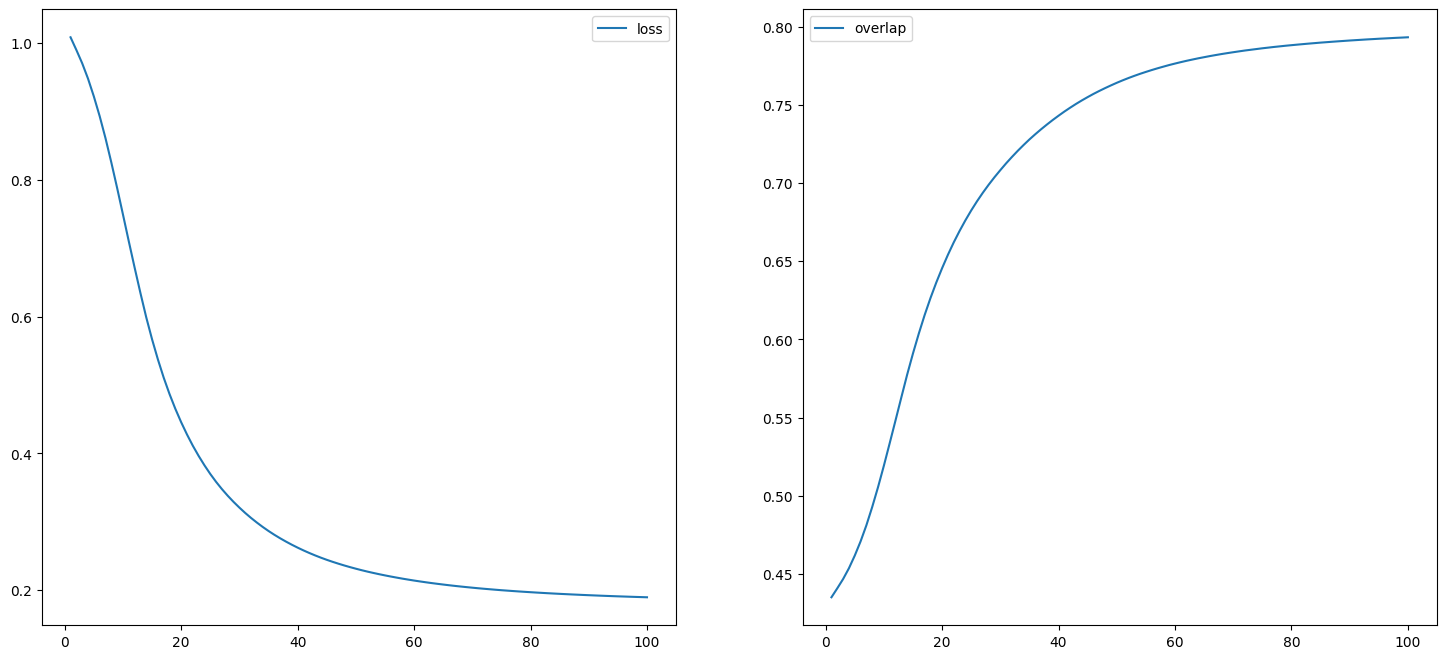

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
ax[0].plot(epochs, loss, label="loss")
# ax[0].plot(epochs, val_loss, label="val_loss")
ax[0].legend()
ax[1].plot(epochs, acc, label="overlap")
# ax[1].plot(epochs, val_acc, label="val_acc")
ax[1].legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
overlap: 0.7207338213920593


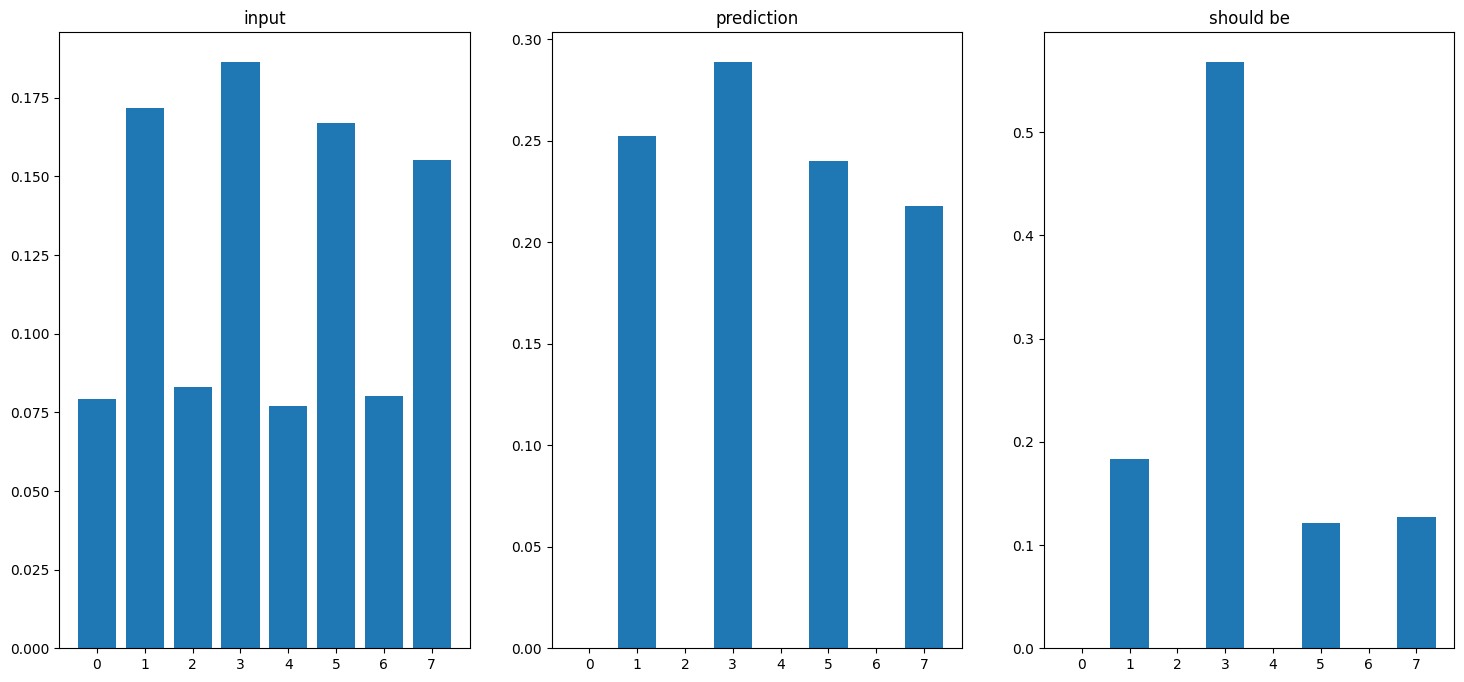

In [8]:
i = 15

pred = test_model.predict(np.array([X[i]]))[0]

xs = np.arange(len(X[i]))

fig, ax = plt.subplots(ncols=3, figsize=(18,8))
ax[0].bar(xs, X[i])
ax[0].set_title("input")
ax[1].bar(xs, pred)
ax[1].set_title("prediction")
ax[2].bar(xs, y[i])
ax[2].set_title("should be")


print(f"overlap: {DistributionOverlapSingle(y[i], pred)}")

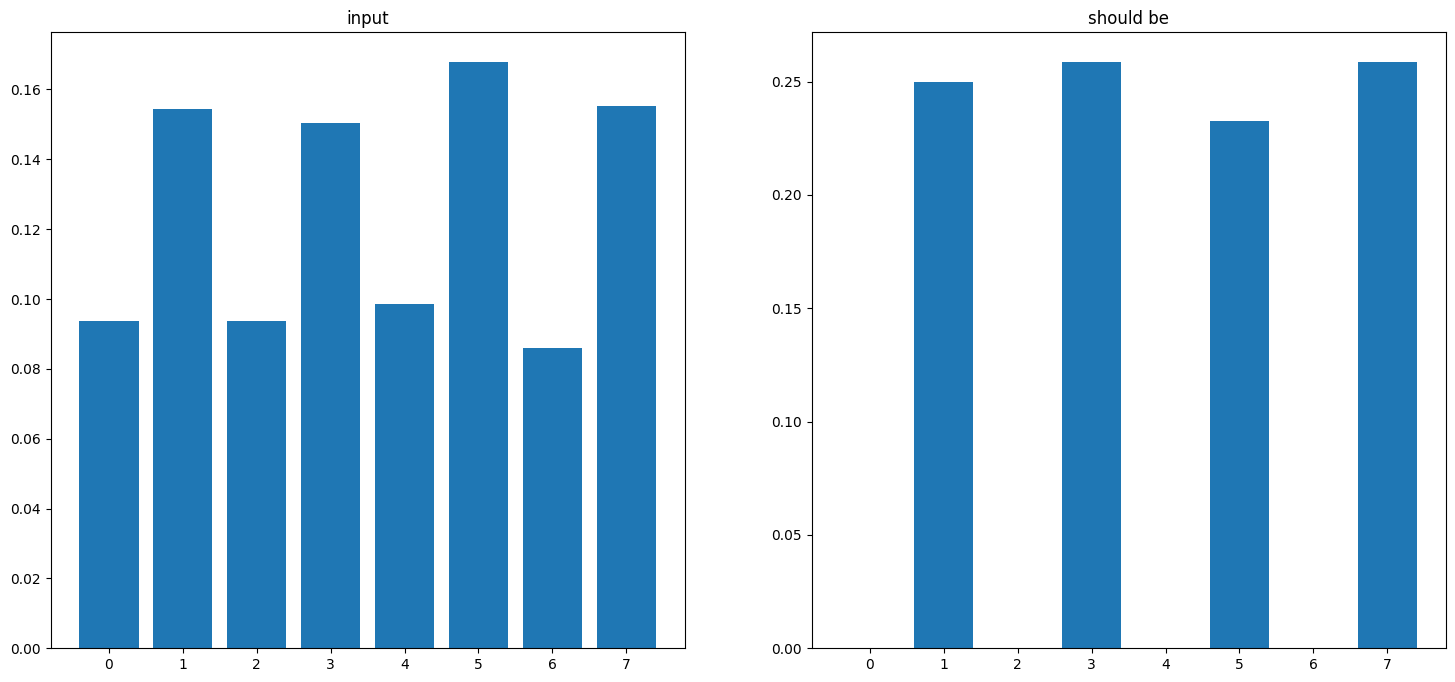

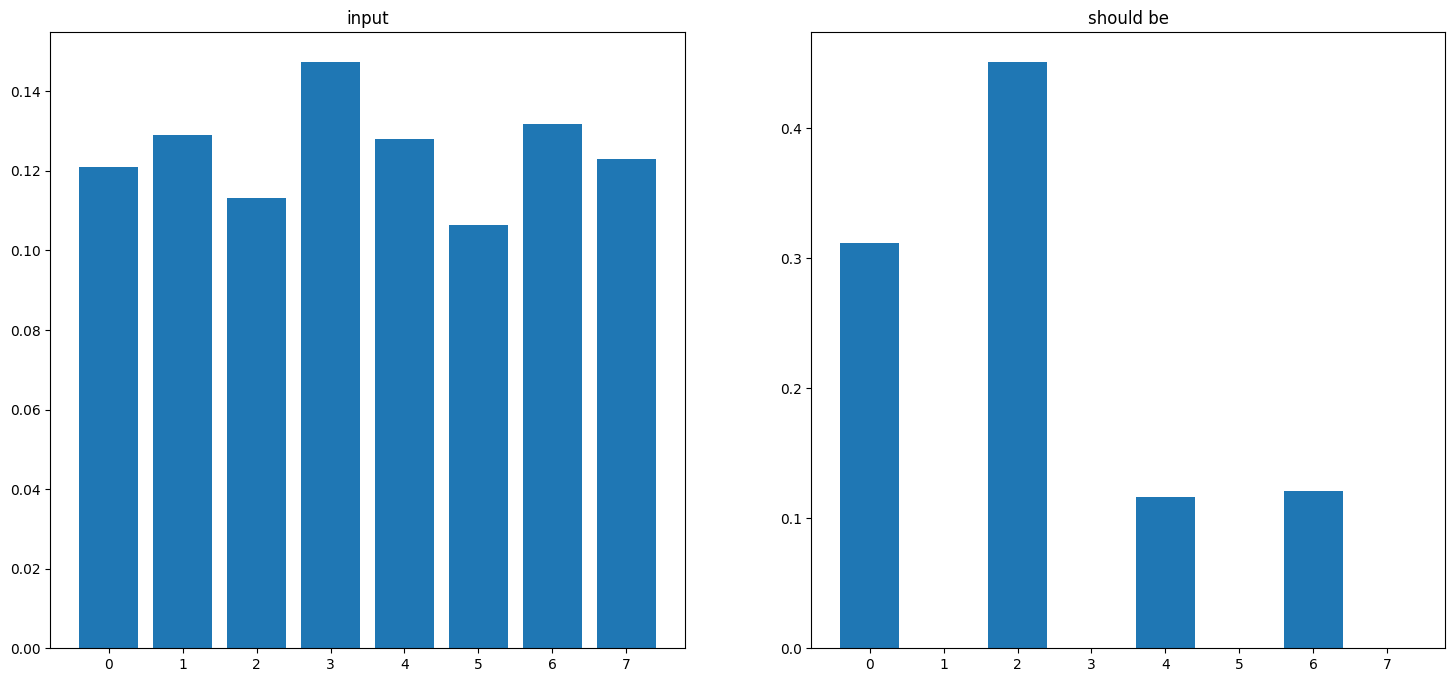

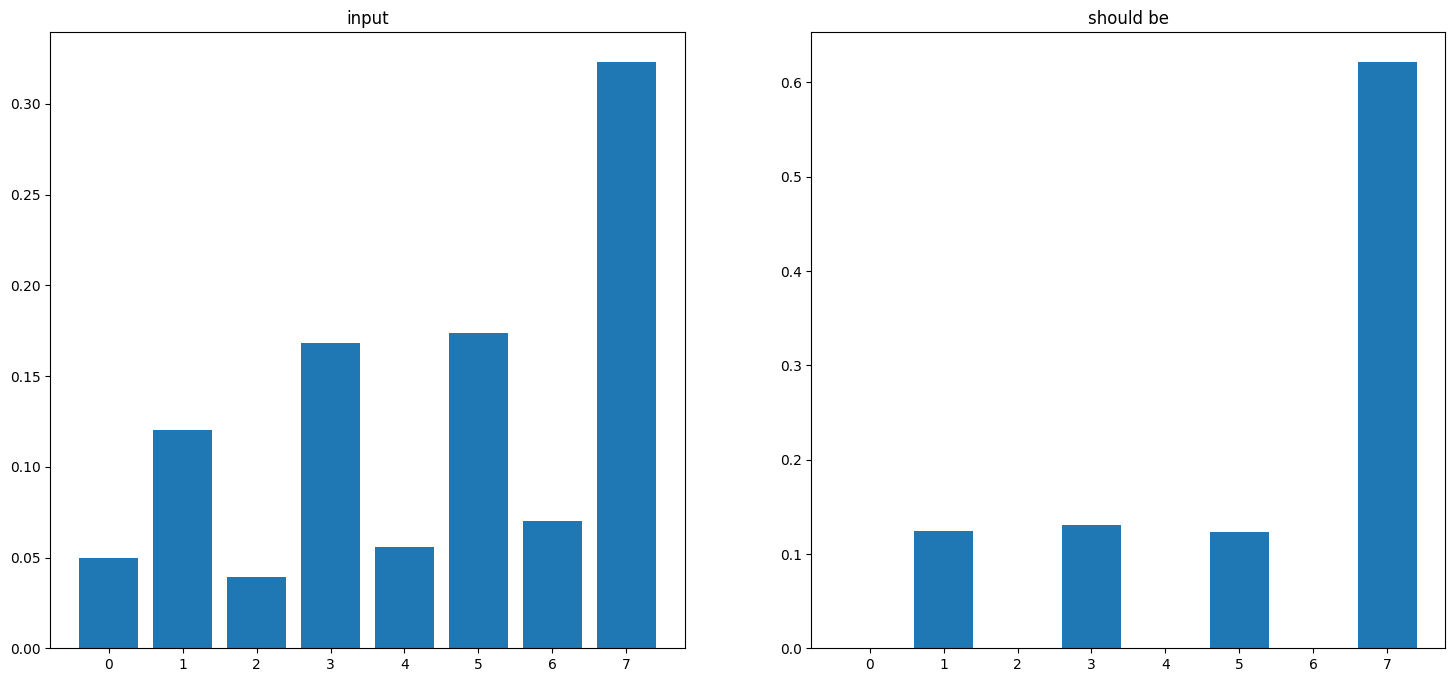

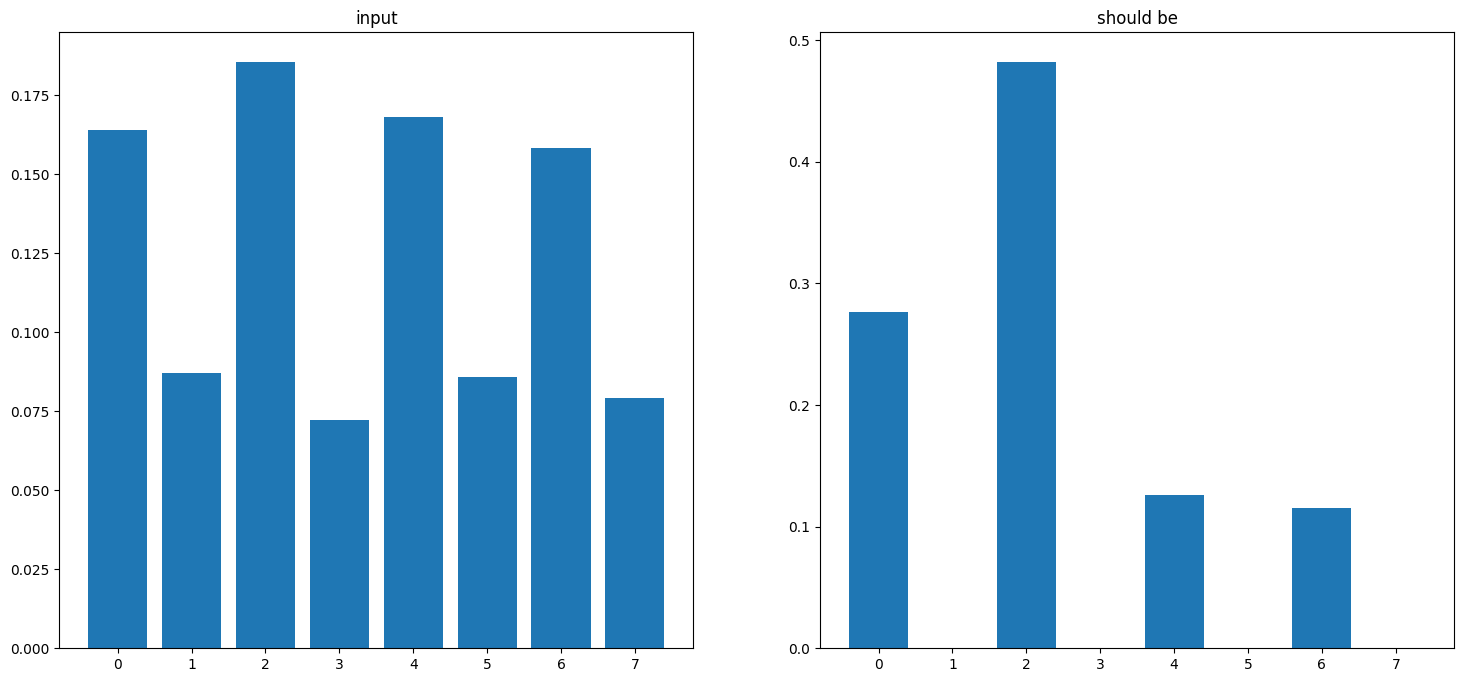

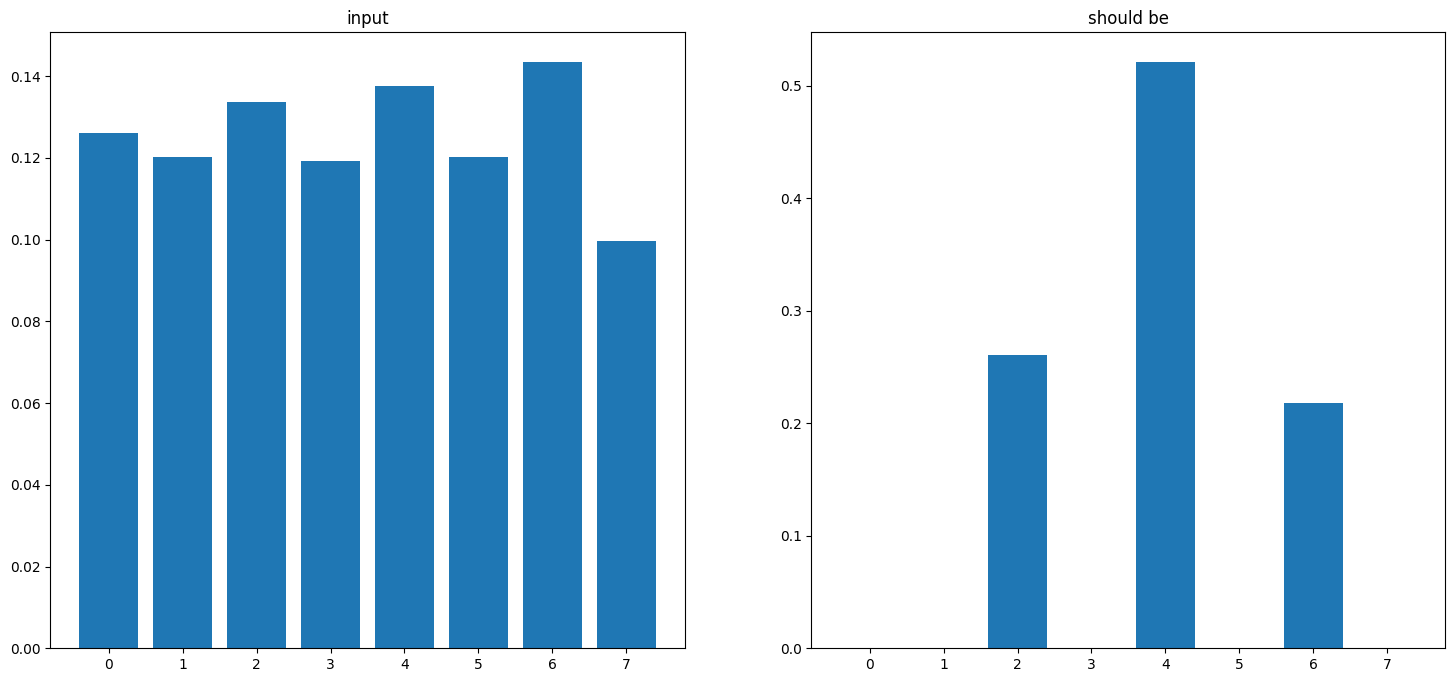

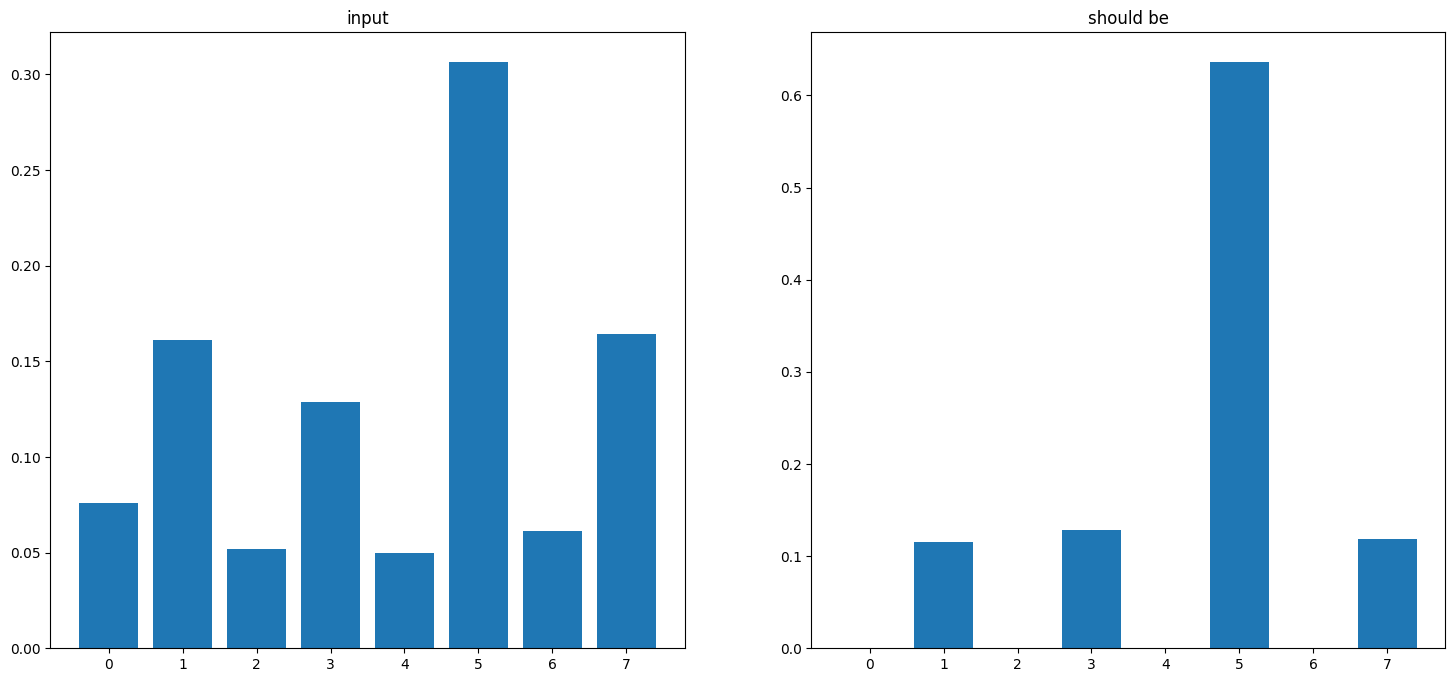

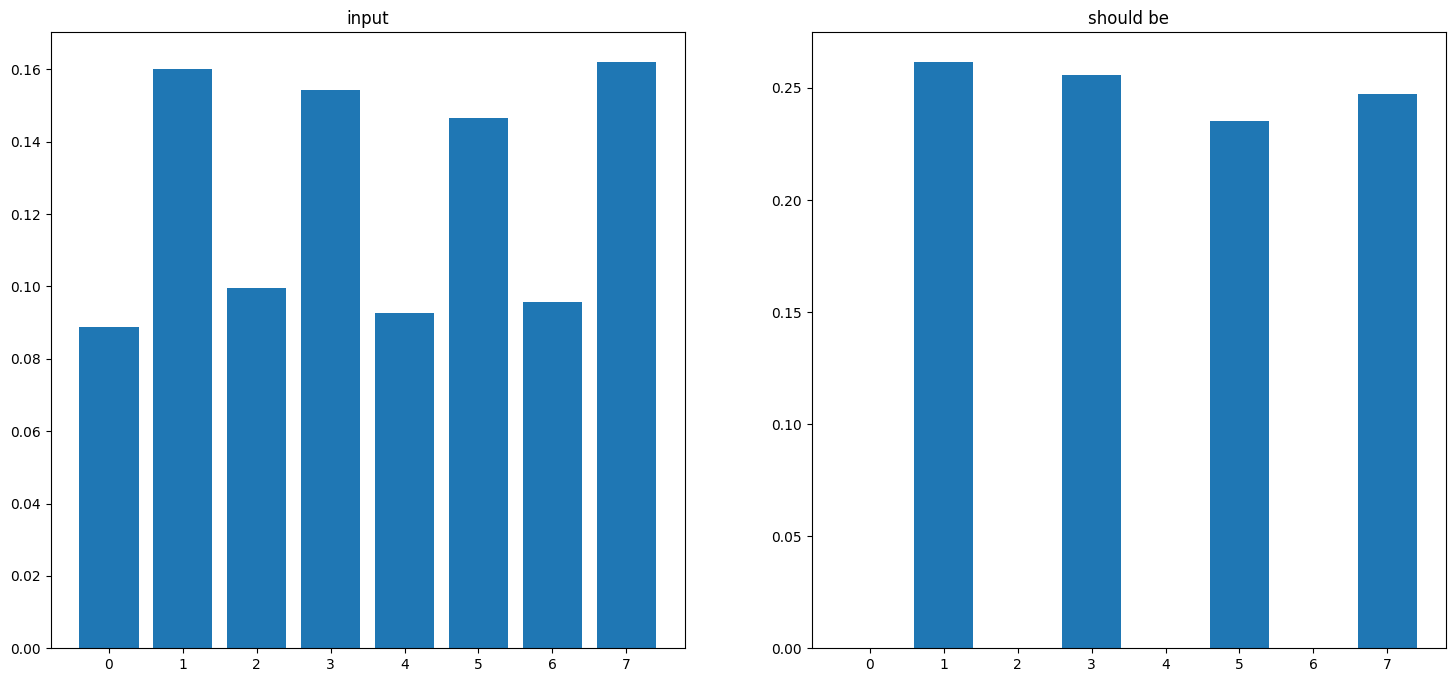

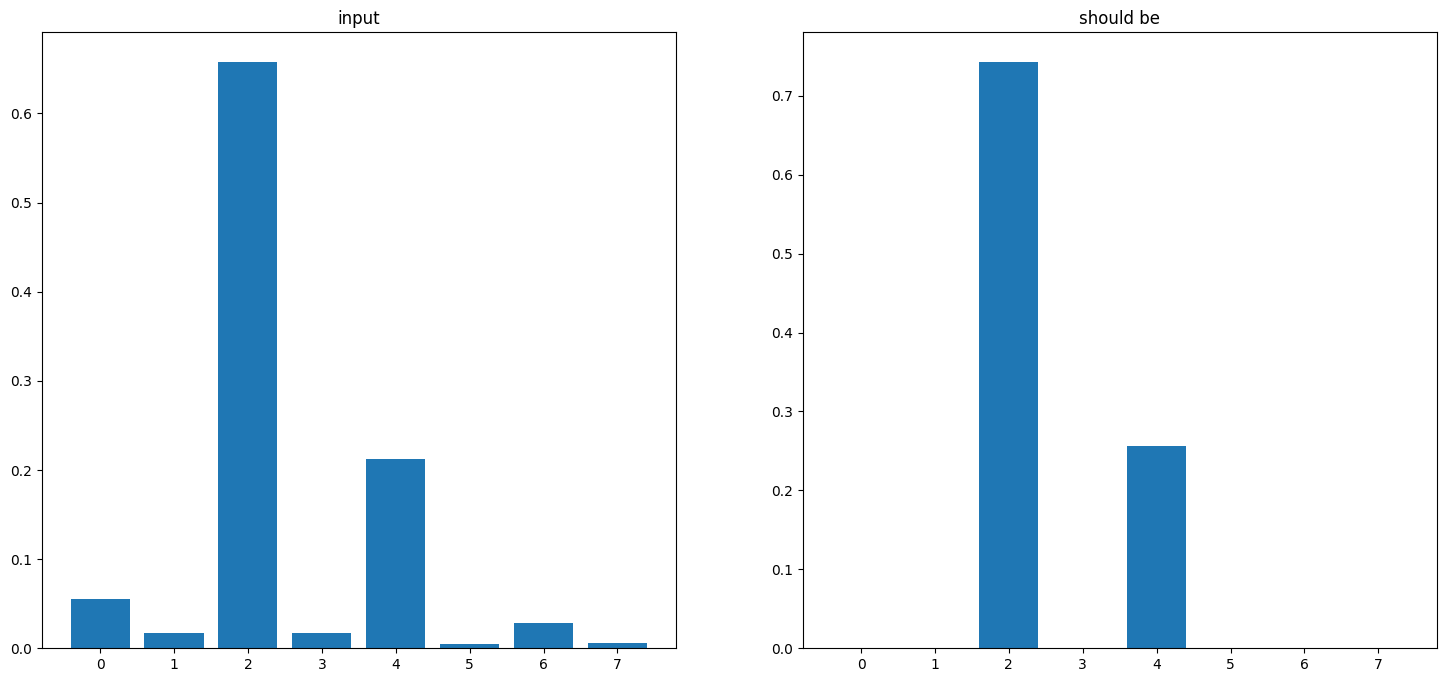

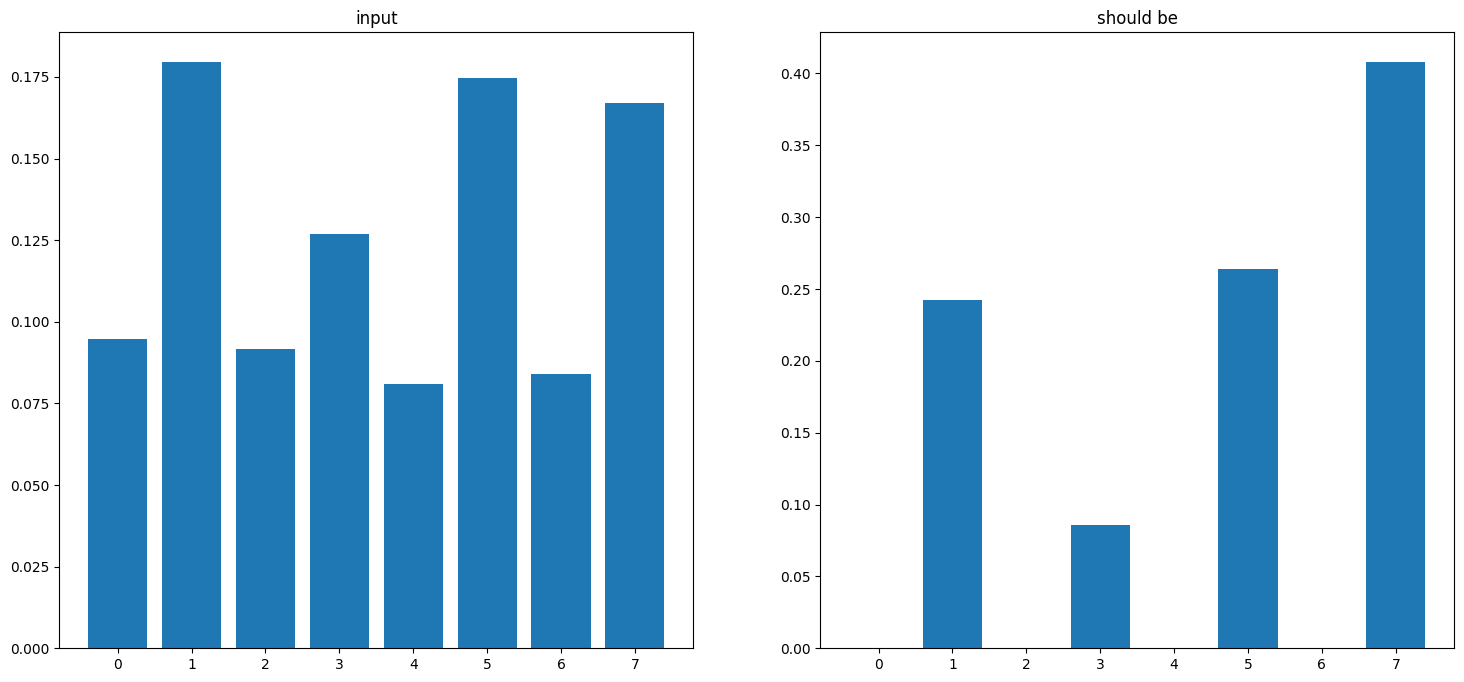

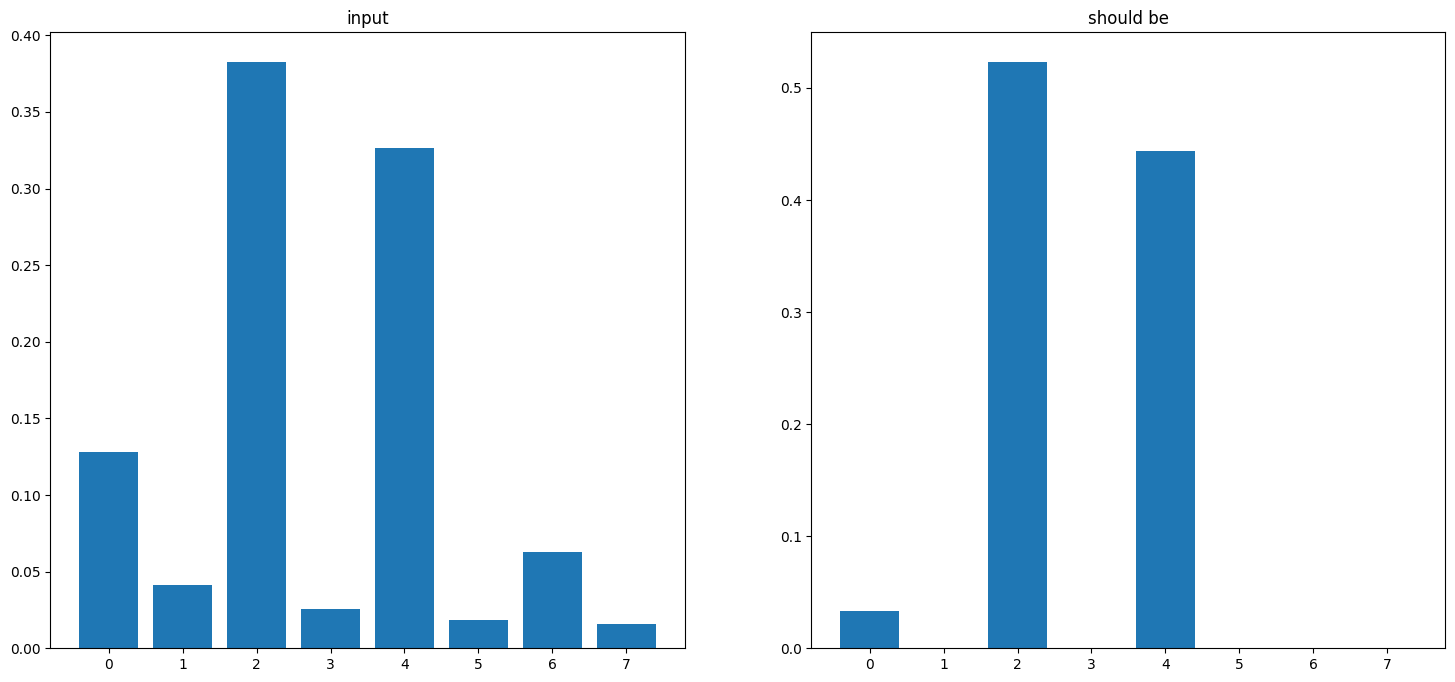

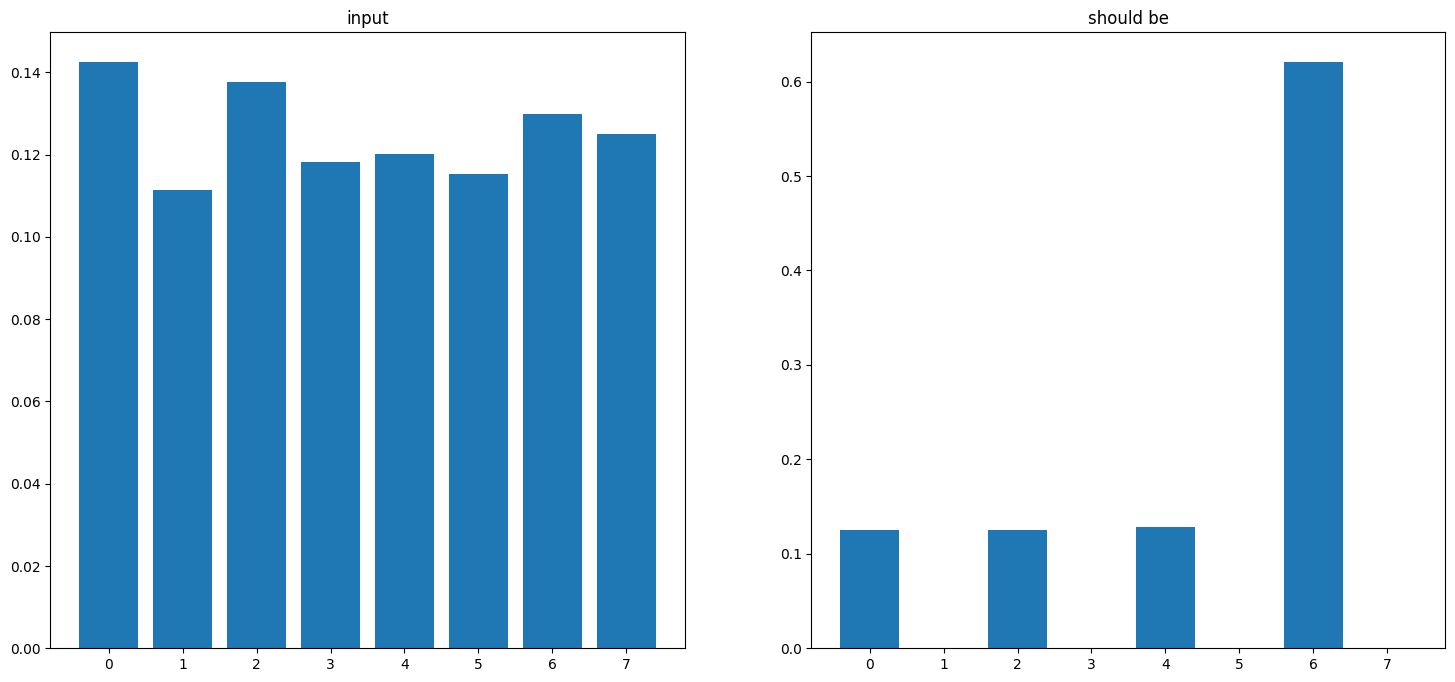

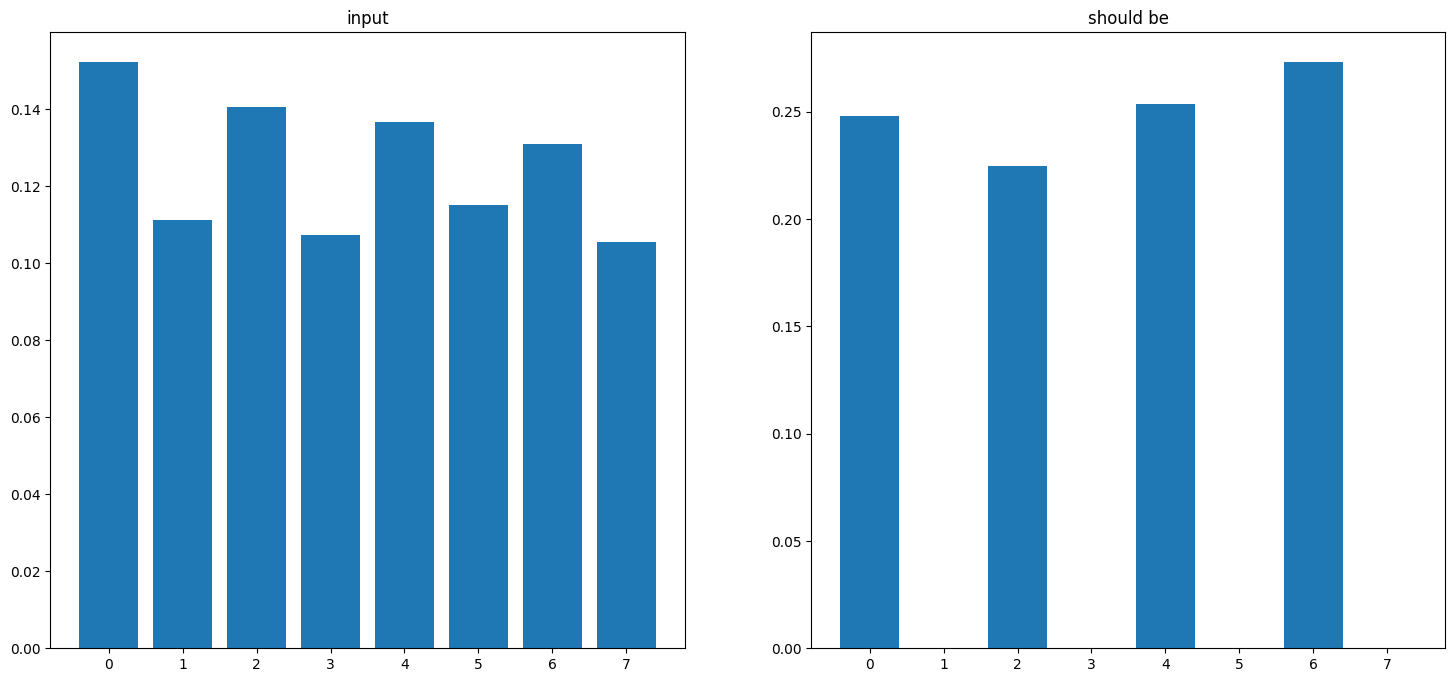

In [ ]:
for i in range(12):
    xs = np.arange(len(X[i]))

    fig, ax = plt.subplots(ncols=2, figsize=(18,8))
    ax[0].bar(xs, X[i])
    ax[0].set_title("input")
    ax[1].bar(xs, y[i])
    ax[1].set_title("should be")
    plt.show()

In [15]:
cnnlayers = [
    tf.keras.layers.Input(shape=(8,1)),
    tf.keras.layers.Conv1D(2, 3, activation='relu'),
    tf.keras.layers.Conv1D(4, 3, activation='relu'),
    tf.keras.layers.Conv1D(8, 3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='softmax'),
]

test_cnnmodel = tf.keras.Sequential(cnnlayers)

test_cnnmodel.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.KLDivergence(),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)
test_cnnmodel.summary()


history = test_cnnmodel.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    # validation_split=0.2
)



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_21 (Conv1D)              │ (None, 6, 2)           │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_22 (Conv1D)              │ (None, 4, 4)           │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_23 (Conv1D)              │ (None, 2, 8)           │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
734/734 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9917 - mean_absolute_error: 0.1399 
Epoch 2/50
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - loss: 0.8470 - mean_absolute_error: 0.1275
Epoch 3/50
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - loss: 0.5945 - mean_absolute_error: 0.1033
Epoch 4/50
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - loss: 0.4477 - mean_absolute_error: 0.0878
Epoch 5/50
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - loss: 0.3794 - mean_absolute_error: 0.0802
Epoch 6/50
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - loss: 0.3418 - mean_absolute_error: 0.0759
Epoch 7/50
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - loss: 0.3166 - mean_absolute_error: 0.0728
Epoch 8/50
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - loss: 0.2983 - mean_absolute_error: 0.0705
Epoch 9/50
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - loss: 0.2844 - mean_absolute_error: 0.0687
Epoch 10/50
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - loss: 0.2729 - mean_absolute_error: 0.0670
Epoch 11/5

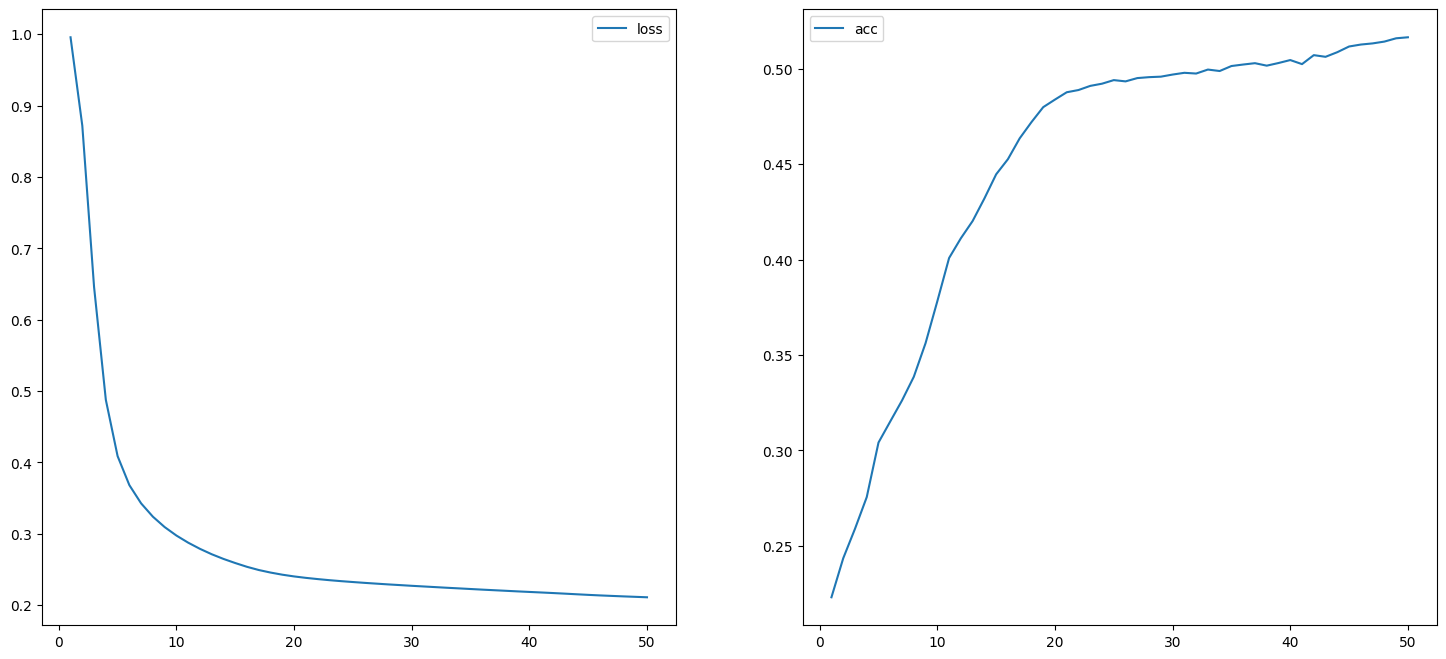

In [8]:
loss = history.history['loss']
acc = history.history['acc']

epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(ncols=2, figsize=(18,8))
ax[0].plot(epochs, loss, label="loss")
ax[0].legend()
ax[1].plot(epochs, acc, label="acc")
ax[1].legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


<BarContainer object of 8 artists>

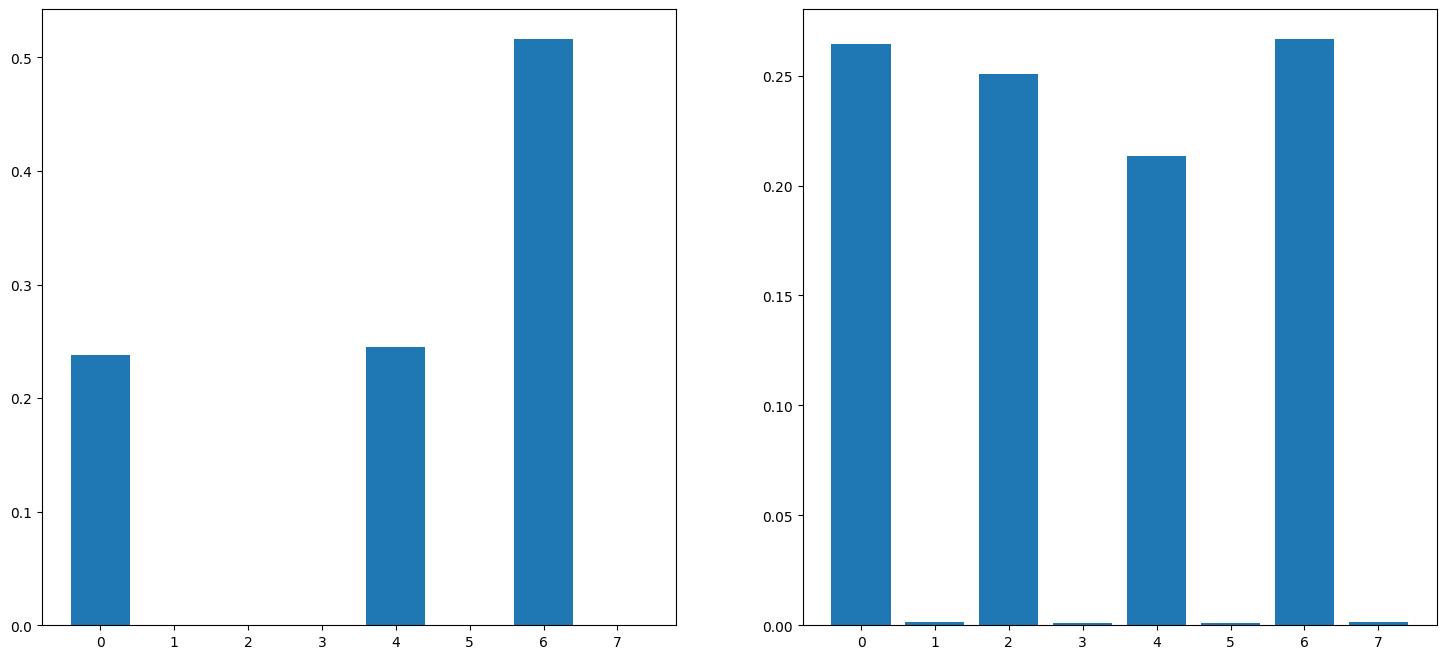

In [13]:
i = 2

pred = test_cnnmodel.predict(np.array([X_test[i]]))[0]

fig, ax = plt.subplots(ncols=2, figsize=(18,8))

ax[0].bar(np.arange(8), y_test[i])
ax[1].bar(np.arange(8), pred)

In [11]:
layers = [
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax'),
]

test_model_mse = tf.keras.Sequential(layers)

test_model_mse.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='mse',
    metrics=['acc']
)
# test_model.summary()


history = test_model_mse.fit(
    X, y,
    epochs=100,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/100


2026-01-15 23:02:20.952866: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-01-15 23:02:20.952901: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-01-15 23:02:20.952915: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-01-15 23:02:22.018130: I external/l

722/734 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - acc: 0.0543 - loss: 0.0356

2026-01-15 23:02:24.441793: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-01-15 23:02:24.441829: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-01-15 23:02:24.441843: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-01-15 23:02:24.950207: I external/l

734/734 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - acc: 0.1022 - loss: 0.0353 - val_acc: 0.2022 - val_loss: 0.0350
Epoch 2/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.2603 - loss: 0.0348 - val_acc: 0.2941 - val_loss: 0.0345
Epoch 3/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.2817 - loss: 0.0342 - val_acc: 0.2645 - val_loss: 0.0337
Epoch 4/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.2839 - loss: 0.0333 - val_acc: 0.3039 - val_loss: 0.0328
Epoch 5/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.3233 - loss: 0.0323 - val_acc: 0.3278 - val_loss: 0.0317
Epoch 6/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.3375 - loss: 0.0312 - val_acc: 0.3373 - val_loss: 0.0305
Epoch 7/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.3502 - loss: 0.0300 - val_acc: 0.3580 - val_loss: 0.0292
Epoch 8/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.3665 - loss: 0.0286 - val_acc: 0.3712 - val_loss: 0.0278
Epoch 9/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 

In [ ]:
loss = history.history['loss']
acc = history.history['acc']

epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(ncols=2, figsize=(18,8))
ax[0].plot(epochs, loss, label="loss")
ax[0].legend()
ax[1].plot(epochs, acc, label="acc")
ax[1].legend()

In [ ]:
i = 2

pred = test_model_mse.predict(np.array([X_test[i]]))[0]

fig, ax = plt.subplots(ncols=2, figsize=(18,8))

ax[0].bar(np.arange(8), y_test[i])
ax[1].bar(np.arange(8), pred)